# Elections Ad Spending Analysis in Argentina using Python(2023)

#### We collected data from Google ads about how much money was spent in formats like text, videos or image by political parties during Argentina elections 2023. In this article, we perform elections ad spending analysis - EDA - using Python (and how it impacted the voting patterns).

## Data Collection

We extract the dataset from Ads Transparency Center which format is in Google Sheet. We transform this and download it in a .csv format. 

We import the library pandas for dataframe manipulation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import numpy as np

In [2]:
df_ads = pd.read_csv("/home/andy/Descargas/ds_googleads.csv") #cambiar esto, quiero que me aparezca
                                                                #sólo el nombre de la carpeta
print("Shape of dataset: ", df_ads.shape)


Shape of dataset:  (5813, 22)


In [4]:
# Let's see the column names
df_ads.keys()

Index(['Ad_ID', 'Ad_URL', 'Ad_Type', 'Regions', 'Advertiser_ID',
       'Advertiser_Name', 'Ad_Campaigns_List', 'Date_Range_Start',
       'Date_Range_End', 'Num_of_Days', 'Impressions', 'Spend_USD',
       'First_Served_Timestamp', 'Last_Served_Timestamp', 'Age_Targeting',
       'Gender_Targeting', 'Geo_Targeting_Included', 'Geo_Targeting_Excluded',
       'Spend_Range_Min_USD', 'Spend_Range_Max_USD', 'Spend_Range_Min_ARS',
       'Spend_Range_Max_ARS'],
      dtype='object')

In [5]:
# Let's check it out, for example, the first URL 
df_ads['Ad_URL'][0]

'https://adstransparency.google.com/advertiser/AR14823408713892626433/creative/CR10079170796300795905?political=&region=AR'

In [6]:
len(df_ads['Advertiser_ID'].unique())

145

In [50]:
ucrn = 'AR16124137016865587201'
df_ads[df_ads['Advertiser_ID'] == ucrn]

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
292,CR07669889306558726145,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-04-11,2023-04-14,4,...,2023-04-11T17:10:00Z,2023-04-14T21:52:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","90.000,00",105000.0
293,CR05370018844507111425,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-04-09,2023-04-16,9,...,2023-04-09T03:09:00Z,2023-04-16T20:13:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","60.000,00",75000.0
294,CR05754818227414761473,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-24,2023-04-16,24,...,2023-03-24T12:37:00Z,2023-04-16T20:13:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","60.000,00",75000.0
295,CR05090480107772968961,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-25,2023-04-14,22,...,2023-03-25T03:14:00Z,2023-04-14T21:52:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Neuquen,Argentina",NaN,"0,00","100,00","15.000,00",30000.0
296,CR11241685264982081537,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-09,2023-03-24,15,...,2023-03-09T10:56:00Z,2023-03-24T09:39:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Neuquen,Argentina",NaN,"0,00","100,00","0,00",15000.0
297,CR01052333439254003713,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-04-09,2023-04-16,8,...,2023-04-09T08:13:00Z,2023-04-16T19:43:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","0,00",15000.0
298,CR09629849047418273793,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-23,2023-04-08,17,...,2023-03-23T20:59:00Z,2023-04-08T10:53:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","15.000,00",30000.0
299,CR04315980268876857345,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-01,2023-03-24,23,...,2023-03-01T11:55:00Z,2023-03-24T10:10:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","135.000,00",150000.0
300,CR15356554755375628289,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-01,2023-04-01,30,...,2023-03-01T12:15:00Z,2023-04-01T04:15:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","450.000,00",500000.0
301,CR17556184391590346753,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR16124137016865587201,Union Civica Radical distrito Neuquen,NaN,2023-03-23,2023-04-08,17,...,2023-03-23T19:50:00Z,2023-04-08T10:53:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Neuquen,Argentina",NaN,"0,00","100,00","15.000,00",30000.0


In [7]:
fr = 'AR14823408713892626433'
df_ads[df_ads['Advertiser_ID'] == fr]

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"


In [8]:
gc = 'AR17825122736721100801'
df_ads[df_ads['Advertiser_ID'] == gc]

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"


In [9]:



df_ads.drop(['Ad_ID'],axis=1)

,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,300000-350000,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,2000000-2250000,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"
2,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,100000-125000,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,6000-7000,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
4,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,3000-4000,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00","15.000,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,300000-350000,...,2023-01-26T15:46:00Z,2023-01-27T13:53:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
5809,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,100000-125000,...,2023-01-26T23:16:00Z,2023-01-27T22:40:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","La Pampa,Argentina",NaN,"0,00","100,00","15.000,00","30.000,00"
5810,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,125000-150000,...,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
5811,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,25000-30000,...,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00","15.000,00"


In [10]:
#show the first 5 rows
df_ads.head()

#levantar datos datetime,
#pd.to_datetime()

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00","15.000,00"


### Data Cleaning & Data Preprocessing

In [11]:
#Let's drop NaN values from the dataframe like 
#Ad_Campaigns_List, Age_Trageting, Gender_Targeting,  Geo_Targeting_Excluded.

display(type(df_ads))  # This should print <class 'pandas.core.frame.DataFrame'>
display(df_ads.head())  # Print the first few rows to ensure it's a valid DataFrame

pandas.core.frame.DataFrame

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00","45.000,00"
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00","60.000,00"
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00","15.000,00"
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00","15.000,00"


In [12]:
# Let's see summary statistics of relevant columns, for example: Spend_Range_Max_ARS:
print(df_ads['Spend_Range_Max_ARS'])

0       45.000,00
1       60.000,00
2       15.000,00
3       15.000,00
4       15.000,00
          ...    
5808    15.000,00
5809    30.000,00
5810    15.000,00
5811    15.000,00
5812    30.000,00
Name: Spend_Range_Max_ARS, Length: 5813, dtype: object


In [13]:
# We convert the data type:'Spend_Range_Max_ARS'  to float
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].astype(float)

# Display the updated data types
print(df_ads.dtypes)


ValueError: could not convert string to float: '45.000,00'

In [18]:
#Given that the inner elements from column 'Spend_Range_Max_AR' has a typing error,
# we fix it in the following way: 

# Remove the thousand separator and replace the decimal separator
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# Convert the column to float
df_ads['Spend_Range_Max_ARS'] = df_ads['Spend_Range_Max_ARS'].astype(float)

# Display the updated DataFrame and data types
display(df_ads)
display(df_ads.dtypes)


,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_ARS,Spend_Range_Max_ARS
0,CR10079170796300795905,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-20,2023-05-09,17,...,2023-04-20T19:36:00Z,2023-05-09T10:43:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","30.000,00",45000.0
1,CR07383048713104523265,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR14823408713892626433,Fernando Rossetto,NaN,2023-04-12,2023-04-19,8,...,2023-04-12T07:26:00Z,2023-04-19T19:16:00Z,NaN,NaN,"Tucuman,Argentina",NaN,"0,00","100,00","45.000,00",60000.0
2,CR08190079252775829505,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-31,2023-04-15,15,...,2023-03-31T00:21:00Z,2023-04-15T04:09:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00",15000.0
3,CR06020378872824987649,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR17825122736721100801,Guillermo Carricavur,NaN,2023-03-29,2023-03-29,2,...,2023-03-29T00:20:00Z,2023-03-29T09:13:00Z,NaN,NaN,"Rio Negro,Argentina",NaN,"0,00","100,00","0,00",15000.0
4,CR01904118294063874049,https://adstransparency.google.com/advertiser/...,TEXT,AR,AR16558549250636513281,NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA,NaN,2022-09-12,2023-05-09,238,...,2022-09-12T07:00:00Z,2023-05-09T11:03:00Z,NaN,NaN,"Argentina, Buenos Aires Province,Argentina, Bu...",NaN,"0,00","100,00","0,00",15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,CR01746279345447501825,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T15:46:00Z,2023-01-27T13:53:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00",15000.0
5809,CR06369083625454960641,https://adstransparency.google.com/advertiser/...,VIDEO,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T23:16:00Z,2023-01-27T22:40:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","La Pampa,Argentina",NaN,"0,00","100,00","15.000,00",30000.0
5810,CR14634596316563374081,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00",15000.0
5811,CR03606406729039872001,https://adstransparency.google.com/advertiser/...,IMAGE,AR,AR15520420058504364033,Primero La Pampa,NaN,2023-01-26,2023-01-27,2,...,2023-01-26T19:53:00Z,2023-01-27T13:49:00Z,NaN,NaN,"La Pampa,Argentina",NaN,"0,00","100,00","0,00",15000.0


Ad_ID                      object
Ad_URL                     object
Ad_Type                    object
Regions                    object
Advertiser_ID              object
Advertiser_Name            object
Ad_Campaigns_List         float64
Date_Range_Start           object
Date_Range_End             object
Num_of_Days                 int64
Impressions                object
Spend_USD                 float64
First_Served_Timestamp     object
Last_Served_Timestamp      object
Age_Targeting              object
Gender_Targeting           object
Geo_Targeting_Included     object
Geo_Targeting_Excluded     object
Spend_Range_Min_USD        object
Spend_Range_Max_USD        object
Spend_Range_Min_ARS        object
Spend_Range_Max_ARS       float64
dtype: object

In [14]:

# Applying Descriptive statistics to the column 'Spend_Range_Max_ARS'
display(df_ads['Spend_Range_Max_ARS'].describe())

count          5813
unique           24
top       15.000,00
freq           4730
Name: Spend_Range_Max_ARS, dtype: object

<Axes: >

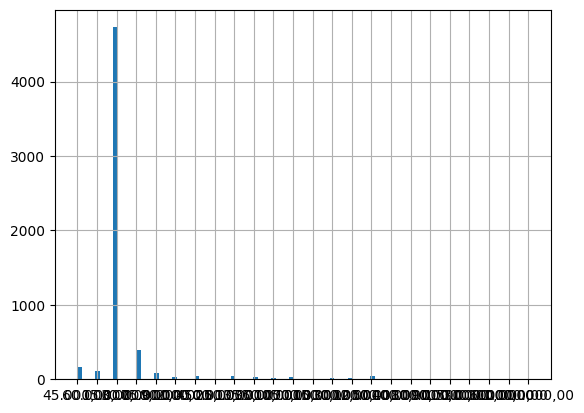

In [15]:
#Let's an histogram of this values
df_ads['Spend_Range_Max_ARS'].hist(bins=100)

#plt.xlim(0, 100000) #TODO (RESEARCH)

In [16]:
#We calculate the mode (most frequent value) of the column 'Spend_Range_Max_ARS':
df_ads['Spend_Range_Max_ARS'].value_counts()

Spend_Range_Max_ARS
15.000,00       4730
30.000,00        400
45.000,00        166
60.000,00        112
75.000,00         82
200.000,00        43
250.000,00        39
120.000,00        38
90.000,00         35
105.000,00        33
135.000,00        29
150.000,00        21
350.000,00        17
300.000,00        14
450.000,00         9
400.000,00         9
700.000,00         8
500.000,00         6
900.000,00         6
600.000,00         5
1.500.000,00       4
800.000,00         3
3.000.000,00       2
1.000.000,00       2
Name: count, dtype: int64

### Ad Spend Analysis

In [17]:
# Get unique ID types
unique_ids = df_ads['Advertiser_ID'].unique()
display("Unique Ad ID:", unique_ids)

'Unique Ad ID:'

array(['AR14823408713892626433', 'AR17825122736721100801',
       'AR16558549250636513281', 'AR02334089119333875713',
       'AR02511925779277807617', 'AR05460365165205651457',
       'AR00529769647432531969', 'AR17006683664399990785',
       'AR18101017142164979713', 'AR16103202590350639105',
       'AR08037723774805606401', 'AR17570548136617705473',
       'AR09928110268150185985', 'AR08840708661442510849',
       'AR02322891418038697985', 'AR16124137016865587201',
       'AR06560599446999007233', 'AR09883561080649678849',
       'AR06644719095910498305', 'AR10741556458169565185',
       'AR03257167751197753345', 'AR11387509643883315201',
       'AR08395009665934557185', 'AR05035512222965563393',
       'AR03447316055154753537', 'AR04356388970465067009',
       'AR14377183739509735425', 'AR09596524774125731841',
       'AR14834515018283745281', 'AR02173886426876215297',
       'AR09937729895381598209', 'AR00142773440292585473',
       'AR18085903255329570817', 'AR16711046015850905601

In [19]:
df_ads['Spend_Range_Max_ARS']

0       45000.0
1       60000.0
2       15000.0
3       15000.0
4       15000.0
         ...   
5808    15000.0
5809    30000.0
5810    15000.0
5811    15000.0
5812    30000.0
Name: Spend_Range_Max_ARS, Length: 5813, dtype: float64

In [22]:
#agrupar los valores de dinero que gastó cada Advertiser Id para poder plotear.
#Iterar por cada persona, filtrar el data frame, sumar cuanto gastó cada uno, y hacer el plot the barras.

df_grouped = df_ads.groupby(['Advertiser_ID'])['Spend_Range_Max_ARS'].sum().reset_index()
display(df_grouped)


,Advertiser_ID,Spend_Range_Max_ARS
0,AR00104862416805822465,210000.0
1,AR00142773440292585473,15000.0
2,AR00331894662950289409,180000.0
3,AR00529769647432531969,845000.0
4,AR01103517904550232065,270000.0
...,...,...
140,AR18085903255329570817,150000.0
141,AR18101017142164979713,6990000.0
142,AR18187891892337770497,1980000.0
143,AR18195101527520051201,4080000.0


In [48]:
#Iterar por cda ID único y filtrar , obtener la columna de nombres y chequear que sean iguales

unique_ids = df_ads['Advertiser_ID'].unique()  # Obtener IDs únicos

for unique_ids in unique_ids:

    df_filtered = df_ads[df_ads['Advertiser_ID'] == unique_ids]
    
    # Obtener los nombres únicos asociados al ID actual
    unique_names = df_filtered['Advertiser_Name'].unique()
    
    # Verificar si todos los nombres son iguales
    if len(unique_names) == 1:
        print(f"Todos los nombres para el ID {unique_ids} son iguales: {unique_names[0]}")
    else:
        print(f"Los nombres para el ID {unique_ids} son diferentes: {unique_names}")


Todos los nombres para el ID AR14823408713892626433 son iguales: Fernando Rossetto
Todos los nombres para el ID AR17825122736721100801 son iguales: Guillermo Carricavur
Todos los nombres para el ID AR16558549250636513281 son iguales: NUEVAS NOTICIAS COOPERATIVA DE TRABAJO LIMITADA
Todos los nombres para el ID AR02334089119333875713 son iguales: CAMBIA RIO NEGRO- JUNTOS POR EL CAMBIO
Todos los nombres para el ID AR02511925779277807617 son iguales: MOVIMIENTO DE INTEGRACION Y DESARROLLO
Todos los nombres para el ID AR05460365165205651457 son iguales: Sergio José Basile
Todos los nombres para el ID AR00529769647432531969 son iguales: Ignacio Martin Pacheco
Todos los nombres para el ID AR17006683664399990785 son iguales: Somos Forja
Todos los nombres para el ID AR18101017142164979713 son iguales: PARTIDO JUSTICIALISTA DISTRITO TUCUMAN
Todos los nombres para el ID AR16103202590350639105 son iguales: MASSOMEDIA
Todos los nombres para el ID AR08037723774805606401 son iguales: Luciana Cuk
Todo

In [30]:
df_ads[df_ads['Advertiser_ID'] == 'AR00104862416805822465' ]['Spend_Range_Max_ARS'].sum() 

np.float64(210000.0)

In [29]:
df_ads[df_ads['Advertiser_ID'] == 'AR00104862416805822465' ]['Spend_Range_Max_ARS']#.sum() 

5213    15000.0
5214    15000.0
5215    15000.0
5216    15000.0
5217    15000.0
5218    15000.0
5219    15000.0
5220    15000.0
5221    15000.0
5222    15000.0
5223    15000.0
5224    15000.0
5225    15000.0
5226    15000.0
Name: Spend_Range_Max_ARS, dtype: float64

In [31]:
df_ads[df_ads['Advertiser_ID'] == 'AR18101017142164979713' ]['Spend_Range_Max_ARS'].sum() 

np.float64(6990000.0)

In [36]:
sum([1,2])

3

In [38]:
suma_elem = sum(df_ads[df_ads['Advertiser_ID'] == 'AR18101017142164979713' ]['Spend_Range_Max_ARS'].tolist())
print(suma_elem)

6990000.0


#### Plot bar

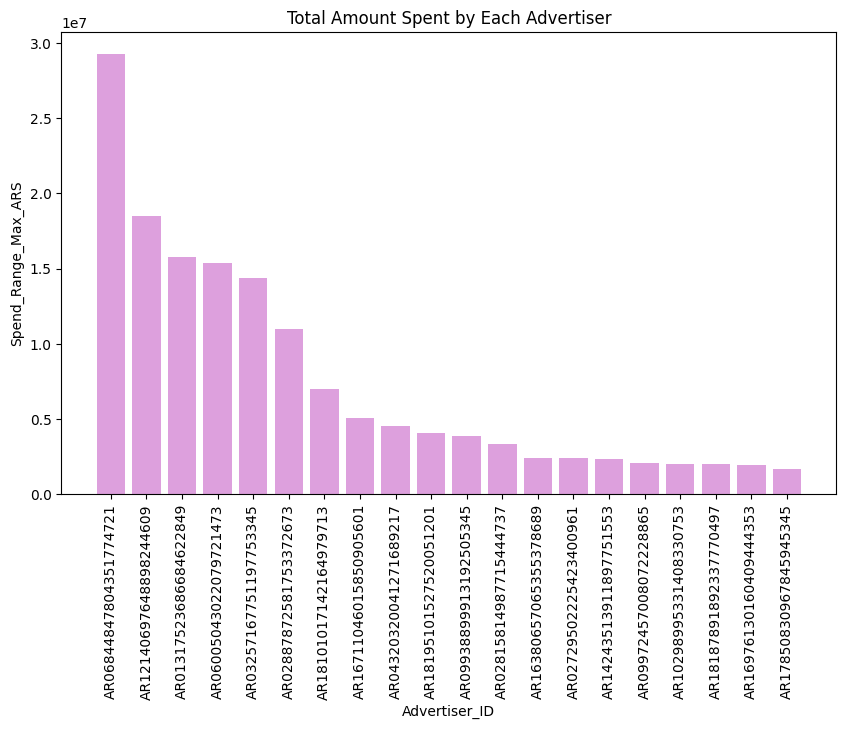

In [41]:

#the convert problem started here 
df_top_advertisers = df_grouped.nlargest(20, 'Spend_Range_Max_ARS')

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_top_advertisers['Advertiser_ID'], df_top_advertisers['Spend_Range_Max_ARS'], color='plum')

# Customizing the plot
plt.xlabel('Advertiser_ID')
plt.ylabel('Spend_Range_Max_ARS')
plt.title('Total Amount Spent by Each Advertiser')
plt.xticks(rotation=90)

# Showing the plot
plt.show()

